In [1]:
import torch
import torchvision
import numpy as np
import d2lzh_pytorch as d2l

# 获取且读取数据

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

# 初始化模型参数

In [3]:
# 特征向量的宽度 28 * 28 = 784, 有10个类别 
# X -> (batch_size, 784), W -> (784, 10), b -> (1, 10)
num_inputs = 784
num_outputs = 10

W = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_outputs)), dtype=torch.float)
b = torch.zeros(num_outputs, dtype=torch.float)

W.requires_grad_(requires_grad = True)
b.requires_grad_(requires_grad = True)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

# 实现softmax运算

In [4]:
def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(dim = 1, keepdim = True)  # keepdim = True 意味着，保留行数和列数,依然是一个二维的？
    return X_exp / partition    # broadcast

# 定义模型

In [5]:
def net(X):
    # 利用view函数将图像修改为一维向量  
    return softmax(torch.mm(X.view((-1, num_inputs)), W) + b)

# 定义损失函数

In [6]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat.gather(1, y.view(-1,1)))    # 以y为索引在y_hat选取值，1代表在第二维方向操作，y.view是为了对应

# 计算分类准确率

In [7]:
def accuracy(y_hat, y):
    return (y_hat.argmax(dim=1) == y).float().mean().item()

In [8]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n

# 训练模型

In [9]:
num_epochs, lr = 5, 0.1
d2l.train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, batch_size, [W, b], lr)

epoch 1,loss 0.7883, train acc 0.746, test acc 0.789
epoch 2,loss 0.5717, train acc 0.812, test acc 0.812
epoch 3,loss 0.5255, train acc 0.825, test acc 0.818
epoch 4,loss 0.5016, train acc 0.833, test acc 0.823
epoch 5,loss 0.4862, train acc 0.836, test acc 0.828


# 模型预测

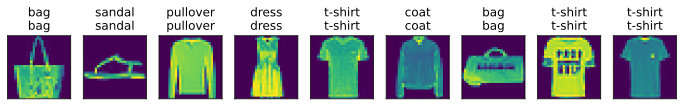

In [11]:
test_iter = iter(test_iter)

X, y =next(test_iter)

true_labels = d2l.get_fashion_mnist_labels(y.numpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(dim=1).numpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]

d2l.show_fashion_mnist(X[0:9], titles[0:9])